# AdventureWorks Försäljning analys

I denna analys undersöker vi AdventureWorks-databasen för att besvara affärsfrågor som exempelvis:
- Produktkategorier och deras försäljning
- Försäljningstrender över tid
- Regional Försäljning

Använder SQL för att hämta data och Python för visualisering och analys.

In [1]:
import pandas as pd
import numpy as np
from src.report import SqlReport
from src.viz import (
    viz_products_per_category,
    viz_total_sell_per_category,
    viz_sell_per_month,
)
from src.metrics import(
    year_month_combined,
)
import matplotlib.pyplot as plt

sql_report = SqlReport()

anslutning till sql server lyckades


c:\Users\VBMar\OneDrive\Skrivbord\Python Code\Skola\GitAllowed\SQLInlämning_Marcus\src\io_utiles.py:24: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


# Mall

## Title

### Affärsfråga


### Metod
Jag använder tabellerna:
-   
-   
-   

Steg:
1.   
2.   
3. 

In [ ]:
query_1 = """
SELECT TOP 5 *
FROM Person.person
"""
query_1_df = sql_report.query_df(query_1)
query_1_df.head()

## 1. Antal produkter per kategori

### Affärsfråga
Hur många produkter finns i varje kategori?

### Metod
Jag använder tabellerna:
- Production.ProductCategory  
- Production.ProductSubcategory  
- Production.Product  

Steg:
1. JOIN mellan kategorier, underkategorier och produkter  
2. Räkna DISTINCT ProductID per kategori  
3. Returnera resultatet som en DataFrame och visualisera med ett vertikalt stapeldiagram

In [ ]:
query_category_total = """
SELECT

    pc.Name as Productname,
    COUNT(DISTINCT(p.ProductID)) as amount

FROM Production.ProductCategory as pc
INNER JOIN Production.ProductSubcategory as psc ON  pc.ProductCategoryID = psc.ProductCategoryID
INNER JOIN Production.Product as p on psc.ProductSubcategoryID = p.ProductSubcategoryID 
GROUP BY pc.Name
"""
query_category_total_df = sql_report.query_df(query_category_total)
viz_products_per_category(query_category_total_df)

## Insikter – Antal produkter per kategori

Components är den största kategorin med 134 produkter, följt av Bikes med 97. 
Accessories är den minsta kategorin med endast 29 produkter.

Detta tyder på att företaget har ett brett sortiment inom Components och Bikes, 
medan Accessories är ett betydligt mindre område och kan vara en potentiell utvecklingsmöjlighet.


## 2: Försäljning per produktkategori

### Affärsfråga
Vilka produkterkategorier säljer mest.

### Metod
Jag använder tabellerna:
-   Production.ProductCategory
-   Production.ProductSubcategory
-   Production.Product
-   Sales.SalesOrderDetail

Steg:
1. JOIN mellan Category, SubCategory, Product och SalesDetail
2. Räknar total försäljning per category
3. return i en Dataframe med productname och revenue och gör en visualisering med ett horisontellt stapeldiagram

In [ ]:

query_sell_per_category ="""
SELECT

    pc.Name as Productname,
    SUM(sod.LineTotal) as Revenue

FROM Production.ProductCategory as pc
INNER JOIN Production.ProductSubcategory as psc ON  pc.ProductCategoryID = psc.ProductCategoryID
INNER JOIN Production.Product as p on psc.ProductSubcategoryID = p.ProductSubcategoryID 
INNER JOIN Sales.SalesOrderDetail as sod on p.ProductID = sod.ProductID
GROUP BY pc.Name
ORDER BY SUM(sod.LineTotal) DESC
"""
query_sell_per_category_df = sql_report.query_df(query_sell_per_category)
viz_total_sell_per_category(query_sell_per_category_df)

## Insikter – Hur mycket pengar kommer in per kategori

Bikes står för 94 651 172 (≈ 86%) i försäljning (sales), components för 11 802 593(≈ 10.7%) medans cloth 2 120 542(≈ 1.9%) och accessories 1 272 072(≈ 1.16%) för en total försäljning på 109 846 379

Bör lägga fokus på Bikes sales och hålla ögonen på components.

## 3: Försäljningstrend över tid

### Affärsfråga

Hur har försäljningen utvecklats över tid?

### Metod
Jag använder tabellerna:
-   Sales.SalesOrderHeader

Steg:
1.  JOIN mellan Sales.SalesOrderDetail och SaleOrderHeader
2.  Göra om Year and Month till Year-Month
3.  Visualize revenue per month ifrån mitt 2022 till 2024 

Notering: Exkluderade År 2025 eftersom databasen endast har fram till 2025-06.

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Monthly Revenue from Mid-2022 to 2024'}, xlabel='Year-Month', ylabel='Revenue'>)

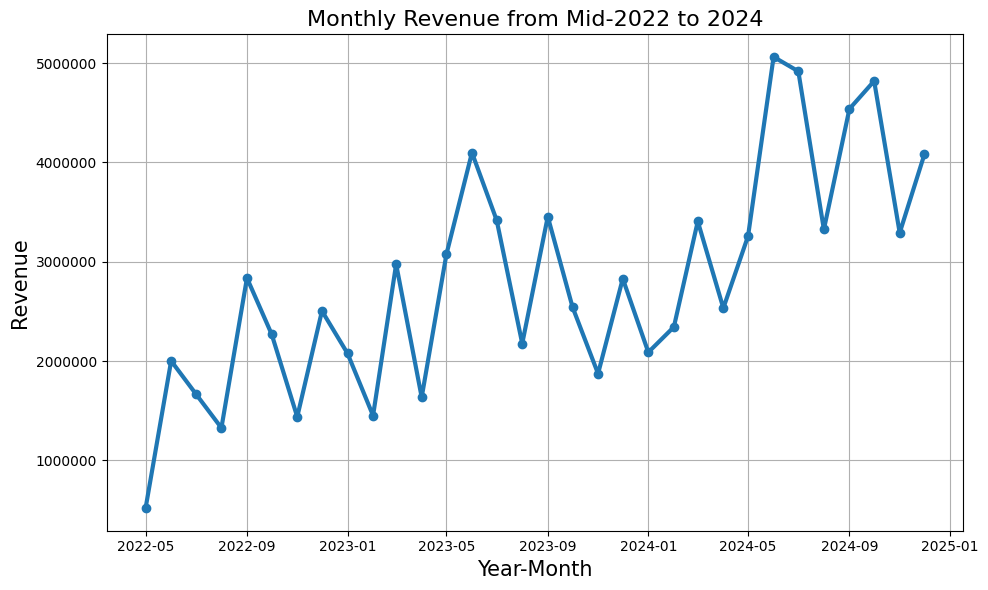

In [2]:
query_sell_per_month ="""
SELECT

    YEAR(soh.OrderDate) as OrderYear,
    MONTH(soh.OrderDate) as OrderMonth,
    SUM(soh.SubTotal) as Revenue

FROM Sales.SalesOrderHeader as soh
WHERE YEAR(soh.OrderDate) < 2025
GROUP BY YEAR(soh.OrderDate), MONTH(soh.OrderDate)
ORDER BY YEAR(soh.OrderDate), MONTH(soh.OrderDate) ASC
"""
query_sell_per_month_df = sql_report.query_df(query_sell_per_month)
viz_sell_per_month(query_sell_per_month_df)

## Insikter - försäljning per månad 

Försäljningen uppvisar tydlig säsongsvariation. Toppnivåerna återkommer våren, tidig höst och i slutet av året.
Trenden ökar svagt över tid vilket indikerar en uppåtgående trend.
Försäljningen är som störst vid tidig höst och som lägst efter nyår. 

Rekommendationer:
Bemanningen anpassas inför återkommande toppar (Våren, Tidig Höst, Slutet av Året).
Planera kampanjer inför höstsäsongen samt erbjuda rabatter efter nyår. 

In [ ]:
fig ,ax = plt.subplots(figsize=(10,6))
X = simple_df["YearMonth"]
Y = simple_df["Revenue"]
ax.plot(X, Y, marker="o", linestyle="-", linewidth="3")

ax.ticklabel_format(style="plain", axis="y")
ax.set_title("Monthly Revenue from Mid-2022 to 2024", fontsize=16)
ax.set_xlabel("Year-Month", fontsize="15")
ax.set_ylabel("Revenue", fontsize="15")
ax.grid(True, axis="both")

plt.tight_layout()
